In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# classifier we will use
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# Detecting Spam with Decision Trees

In this assignment you will detect spam with decision trees. It's always important to investigate the data that you are using for any project. Since data is our gold mine, it's our oil that powers our models we need to have good quality data. Machine learning follows the "garbage in, garbage out" principle, if we feed in bad data for training, we will get a model that produces bad results.  For these reasons we want to answer the following questions.

## 0.  Learn about the data

1. Where did this data come from?
2. Who made it?
3. How were the features selected?
4. Can you trust it?

Go ahead and scan through the spambase_features.txt file and the spambase.txt file.  These two files provide information about the dataset, how it was curated and where it came from. Then try to answer the above questions.


## 1. Load the data

In [3]:
## we are going to hardcode the column names, because this just makes it a little easier to use pandas.

names = ['word_freq_make:        ',
'word_freq_address:     ',
'word_freq_all:         ',
'word_freq_3d:          ',
'word_freq_our:         ',
'word_freq_over:        ',
'word_freq_remove:      ',
'word_freq_internet:    ',
'word_freq_order:       ',
'word_freq_mail:        ',
'word_freq_receive:     ',
'word_freq_will:        ',
'word_freq_people:      ',
'word_freq_report:      ',
'word_freq_addresses:   ',
'word_freq_free:        ',
'word_freq_business:    ',
'word_freq_email:       ',
'word_freq_you:         ',
'word_freq_credit:      ',
'word_freq_your:        ',
'word_freq_font:        ',
'word_freq_000:         ',
'word_freq_money:       ',
'word_freq_hp:          ',
'word_freq_hpl:         ',
'word_freq_george:      ',
'word_freq_650:         ',
'word_freq_lab:         ',
'word_freq_labs:        ',
'word_freq_telnet:      ',
'word_freq_857:         ',
'word_freq_data:        ',
'word_freq_415:         ',
'word_freq_85:          ',
'word_freq_technology:  ',
'word_freq_1999:        ',
'word_freq_parts:       ',
'word_freq_pm:          ',
'word_freq_direct:      ',
'word_freq_cs:          ',
'word_freq_meeting:     ',
'word_freq_original:    ',
'word_freq_project:     ',
'word_freq_re:          ',
'word_freq_edu:         ',
'word_freq_table:       ',
'word_freq_conference:  ',
'char_freq_;:           ',
'char_freq_(:           ',
'char_freq_[:           ',
'char_freq_!:           ',
'char_freq_$:           ',
'char_freq_#:           ',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total: ',
'label']
          

In [12]:

for i in range(len(names)):
    print(f"{i}  {names[i]}")
    

0  word_freq_make:        
1  word_freq_address:     
2  word_freq_all:         
3  word_freq_3d:          
4  word_freq_our:         
5  word_freq_over:        
6  word_freq_remove:      
7  word_freq_internet:    
8  word_freq_order:       
9  word_freq_mail:        
10  word_freq_receive:     
11  word_freq_will:        
12  word_freq_people:      
13  word_freq_report:      
14  word_freq_addresses:   
15  word_freq_free:        
16  word_freq_business:    
17  word_freq_email:       
18  word_freq_you:         
19  word_freq_credit:      
20  word_freq_your:        
21  word_freq_font:        
22  word_freq_000:         
23  word_freq_money:       
24  word_freq_hp:          
25  word_freq_hpl:         
26  word_freq_george:      
27  word_freq_650:         
28  word_freq_lab:         
29  word_freq_labs:        
30  word_freq_telnet:      
31  word_freq_857:         
32  word_freq_data:        
33  word_freq_415:         
34  word_freq_85:          
35  word_freq_technology:  
36

In [11]:
## Load in the dataset here 

data = pd.read_csv('spambase/spambase.csv', names = names)
X = data.drop('label', axis = 1)
y = data.label

## 2. Preprocess the data if needed

1. Are there any empty values?

No.
    Not sure how to check this with a code. 

2. Do you need to transform the data?

I think so.

3. What is the distribution of the positive and negative classes?

From txt:
        "5. Number of Instances: 4601 (1813 Spam = 39.4%)"
        
        negative = 2788 60.6%

4. Split the data into training and testing sets

Let me give a few hints.  When it comes to scaling the data, we normally just _should_, but in this case we are going to be working with decision trees and I think we learned that they have an interesting property!  

We want to look at the distribution of positive (spam) and negative (ham) classes.  So basically we need to look at the count of the labels.  You can use the function `.value_counts()` on `y`.  Note that the function `value_counts` is specific to the Series class, it doesn't work on Dataframes.  Now it's not just enough to look at the raw numbers, I suggest you calculate statistics like "what percentage of my data is ham? What percentage is spam?  This may help you decide if you should use the `stratify` keyword when splitting your data.


In [50]:
X_train, X_test, y_train, y_test = train_test_split(stratify=X,y, test_size = .3)

y_value = y.value_counts()
y_train_value = y_train.value_counts()
print(y_value)
print(y_train_value)

# negative total = 
negative_train_total = y_train_value[0]
positive_train_total = y_train_value[1] 
train_total = negative_train_total + positive_train_total
percent_neg = negative_train_total/train_total
percent_pos = positive_train_total/train_total
print(f"\nPercent (-) = {percent_neg}")
print(f"\nPercent (+) = {percent_pos}")

# negative_total = 2788
# positive_total = 1813
# total = negative_total + positive_total
# print(negative_total/total)

0    2788
1    1813
Name: label, dtype: int64
0    1950
1    1270
Name: label, dtype: int64

Percent (-) = 0.6055900621118012

Percent (+) = 0.3944099378881988


In [46]:
# Split your data with 70% for training, this is somewhat random, but this is how I will do it in the 
# solution video so you will have similar results. Feel free to change this value and experiment if you like.

# print(X_train.shape)
# print(X_test.shape)
# print(y.value_counts())

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

In [53]:
data.isnull().any().sum()

0

In [54]:
data.label.sum()/data.shape[0]

0.39404477287546186

In [55]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64

In [58]:
data.mean()

word_freq_make:                 0.104553
word_freq_address:              0.213015
word_freq_all:                  0.280656
word_freq_3d:                   0.065425
word_freq_our:                  0.312223
word_freq_over:                 0.095901
word_freq_remove:               0.114208
word_freq_internet:             0.105295
word_freq_order:                0.090067
word_freq_mail:                 0.239413
word_freq_receive:              0.059824
word_freq_will:                 0.541702
word_freq_people:               0.093930
word_freq_report:               0.058626
word_freq_addresses:            0.049205
word_freq_free:                 0.248848
word_freq_business:             0.142586
word_freq_email:                0.184745
word_freq_you:                  1.662100
word_freq_credit:               0.085577
word_freq_your:                 0.809761
word_freq_font:                 0.121202
word_freq_000:                  0.101645
word_freq_money:                0.094269
word_freq_hp:   

## 3. Train a Decision Tree Classifier

1. What metric should we use? The f1-score or accuracy?

Let's start with a default model, we won't specify any settings on the decision tree model for the first training. The following will be a 3-step process
 * training
 * getting predictions
 * evaluating our predictions
 
The question does arise, what should we check our predictions on? The obvious answer is that we should check the predictions on our testing set. That's the set of data that simulates our future unseen data. However in our quest to figure out if we are overfitting or not, it could be very useful to look at the performance of the training set.  Remember when we overfit our polynomials and they touched every point? But then we added data the performance would drop. Similarly if the perfomance of the training data is near perfect, but the testing data is much worse, that _gap_ indicates overfitting. So we will check both training and testing performance.


In [61]:
## Train the model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)


DecisionTreeClassifier()


In [65]:
## get predictions from the model on the training data and the testing data

train_preds = dtc.predict(X_train)
test_preds = dtc.predict(X_test)



[1 0 1 ... 1 1 1]


In [68]:
## evaluate the predictions
## Note that the order of the arguments is **very** important for f1-score

print(f"F1-score training is {f1_score(y_train, train_preds)} \n")
print(f"F1-score testing is {f1_score(y_test,test_preds)}")

F1-score training is 0.9988175009854159 

F1-score training is 0.8763636363636363


## 4. Did we overfit? Either way, let's try out some of the decision tree parameters

Go ahead and try out some different tree parameters. 

* `max_depth`
* `min_samples_split`
* `min_samples_leaf`

All three of these parameters will control the complexity of the tree.  Before you try them out, let's take a quick quiz:

* increasing `max_depth` will : **Increase** or **Decrease** overfitting?
* increasing `min_samples_split` will: **Increase** or **Decrease** overfitting?
* increasing `min_samples_leaf` will: **Increase** or **Decrease** overfitting?

It's very important to know the answer to these questions - because other wise you can't tune the parameters correctly. If you aren't sure go back and check the quiz on this very topic.

Go ahead and try at least 3 values for each parameter. Then if you try 3 values for each combination, you actually would try 9 total parameters. You can see where this is going -- `for` loops! At this point I encourage you to just try whatever method you want, you can ad-hoc try different values or you can get robust with for-loops. Whatever you are inspired to do. The main point is to try out some values and see what you find.  What helps improve our testing performance the best?

In [125]:
dtc_max_depth = DecisionTreeClassifier()
dtc_min_split = DecisionTreeClassifier()
dtc_min_leaf = DecisionTreeClassifier()

dtc_list = [dtc_max_depth, dtc_min_split,dtc_min_leaf] 
dtc_max_depth.fit(X_train,y_train)
dtc_min_split.fit(X_train,y_train)
dtc_min_leaf.fit(X_train,y_train)
                  

DecisionTreeClassifier(min_samples_leaf=10)

In [126]:
train_preds_depth = dtc_max_depth.predict(X_train)
test_preds_depth = dtc_max_depth.predict(X_test)


In [127]:
train_preds_split = dtc_min_split.predict(X_train)
test_preds_split = dtc_min_split.predict(X_test)




In [128]:
train_preds_leaf = dtc_min_leaf.predict(X_train)
test_preds_leaf = dtc_min_leaf.predict(X_test)

In [145]:
import random
for i in range(2,10):
    depth_wild = random.randint(2,60)
    split_wild = random.randint(2,10)
    leaf_wild = random.randint(2,10)
    
    dtc_max_depth = DecisionTreeClassifier(max_depth = i)
    dtc_min_split = DecisionTreeClassifier(min_samples_split= i)
    dtc_min_leaf = DecisionTreeClassifier(min_samples_leaf = i)
    dtc_magic = DecisionTreeClassifier(max_depth = depth_wild,min_samples_split= split_wild,min_samples_leaf = leaf_wild)
# 
    dtc_max_depth.fit(X_train,y_train)
    dtc_min_split.fit(X_train,y_train)
    dtc_min_leaf.fit(X_train,y_train)
    dtc_magic.fit(X_train,y_train)
#     
    train_preds_depth = dtc_max_depth.predict(X_train)
    test_preds_depth = dtc_max_depth.predict(X_test)
    
    print(f"\n\n         For Values = {i}")
    print(f"\nMax_Depth = {dtc_max_depth.max_depth}")
    print(f"F1-score training is {f1_score(y_train, train_preds_depth)}")
    print(f"F1-score testing is {f1_score(y_test,test_preds_depth)}\n")
# 
    train_preds_split = dtc_min_split.predict(X_train)
    test_preds_split = dtc_min_split.predict(X_test)
    
    print(f"\nMin_split = {dtc_min_split.min_samples_split}")
    print(f"F1-score training is {f1_score(y_train, train_preds_split)}")
    print(f"F1-score testing is {f1_score(y_test,test_preds_split)}\n")
# 
    train_preds_leaf = dtc_min_leaf.predict(X_train)
    test_preds_leaf = dtc_min_leaf.predict(X_test)
    
    print(f"\nMin_leaf = {dtc_min_leaf.min_samples_leaf}")
    print(f"F1-score training is {f1_score(y_train, train_preds_leaf)}")
    print(f"F1-score testing is {f1_score(y_test, test_preds_leaf)}\n")
    
    train_magic = dtc_magic.predict(X_train)
    test_magic = dtc_magic.predict(X_test)
    
    print(f"Magic: max_depth = {dtc_magic.max_depth}, min_split = {dtc_magic.min_samples_split}, min_leaf = {dtc_magic.min_samples_leaf}") 
    print(f"F1-score training is {f1_score(y_train, train_magic)}")
    print(f"F1-score testing is {f1_score(y_test,test_magic)}\n")
# 



         For Values = 2

Max_Depth = 2
F1-score training is 0.7884444444444445
F1-score testing is 0.7288317256162915


Min_split = 2
F1-score training is 0.9988175009854159
F1-score testing is 0.8641750227894257


Min_leaf = 2
F1-score training is 0.9701130856219708
F1-score testing is 0.8636363636363636

Magic: max_depth = 23, min_split = 8, min_leaf = 5
F1-score training is 0.9448881789137379
F1-score testing is 0.8637627432808155



         For Values = 3

Max_Depth = 3
F1-score training is 0.8613861386138615
F1-score testing is 0.812375249500998


Min_split = 3
F1-score training is 0.9960474308300395
F1-score testing is 0.8634280476626949


Min_leaf = 3
F1-score training is 0.96390321301071
F1-score testing is 0.8493919550982227

Magic: max_depth = 6, min_split = 3, min_leaf = 10
F1-score training is 0.9035947712418301
F1-score testing is 0.8344627299128751



         For Values = 4

Max_Depth = 4
F1-score training is 0.8890728476821192
F1-score testing is 0.8177240684793556



In [167]:
# trying stuff out
import random
train_depth_results = []
train_split_results = []
train_leaf_results = []
train_magic_results = []

test_depth_results = []
train_magic_results = []
test_split_results = []
test_leaf_results = []
test_magic_results = []

for i in range(2,10):
    depth_wild = random.randint(2,60)
    split_wild = random.randint(2,10)
    leaf_wild = random.randint(2,10)
    
    dtc_max_depth = DecisionTreeClassifier(max_depth = i)
    dtc_min_split = DecisionTreeClassifier(min_samples_split= i)
    dtc_min_leaf = DecisionTreeClassifier(min_samples_leaf = i)
    dtc_magic = DecisionTreeClassifier(max_depth = depth_wild,min_samples_split= split_wild,min_samples_leaf = leaf_wild)
# 
    dtc_max_depth.fit(X_train,y_train)
    dtc_min_split.fit(X_train,y_train)
    dtc_min_leaf.fit(X_train,y_train)
    dtc_magic.fit(X_train,y_train)
# 

    train_preds_depth = dtc_max_depth.predict(X_train)
    test_preds_depth = dtc_max_depth.predict(X_test)
    
    train_depth_results.append(f1_score(y_train, train_preds_depth))
    test_depth_results.append(f1_score(y_test,test_preds_depth))
    
# 
    train_preds_split = dtc_min_split.predict(X_train)
    test_preds_split = dtc_min_split.predict(X_test)
    
    train_split_results.append(f1_score(y_train, train_preds_split))
    test_split_results.append(f1_score(y_test,test_preds_split))
    
# 

    train_preds_leaf = dtc_min_leaf.predict(X_train)
    test_preds_leaf = dtc_min_leaf.predict(X_test)
    
    train_leaf_results.append(f1_score(y_train, train_preds_leaf))
    test_leaf_results.append(f1_score(y_test, test_preds_leaf))
    
#     

    train_magic = dtc_magic.predict(X_train)
    test_magic = dtc_magic.predict(X_test)
    
    train_magic_results.append(f1_score(y_train, train_magic))
    test_magic_results.append(f1_score(y_test,test_magic))
    
# 
    

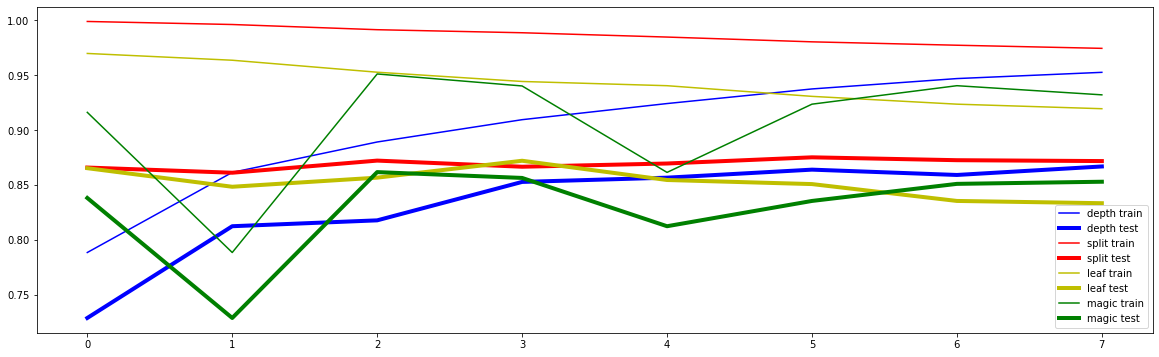

In [168]:
fig,ax = plt.subplots(figsize = (20,6));
ax.plot(train_depth_results, color = 'b', label = 'depth train')
ax.plot(test_depth_results, color = 'b', label = 'depth test', linewidth=4)
ax.plot(train_split_results, color = 'r', label = 'split train')
ax.plot(test_split_results, color = 'r', label = 'split test', linewidth=4)
ax.plot(train_leaf_results, color = 'y', label = 'leaf train')
ax.plot(test_leaf_results, color = 'y', label = 'leaf test', linewidth=4)
ax.plot(train_magic_results, color = 'g', label = 'magic train')
ax.plot(test_magic_results, color = 'g', label = 'magic test', linewidth=4)
ax.legend()

# Ok, now let's do it systematically

Let's do it with some for loops. This will lead us to having more data than we can "look" at, so naturally we will plot it.
I've started the for loop for you, you need to fill in the inner part.

In [158]:
train_results = []
test_results = []
for i in range(2,30): # feel free to change these, I just threw out a reasonable option here.

    dtc = DecisionTreeClassifier(max_depth=i)               #select a parameter to check 
    dtc.fit(X_train,y_train)                                # train the model
    train_preds = dtc.predict(X_train)
    test_preds = dtc.predict(X_test)                        # get predictions for both training and test
    
    train_results.append(f1_score(y_train, train_preds))
    test_results.append(f1_score(y_test, test_preds))      # evaluate them and append them into the our lists.

print(train_results)
print ( " ")
print (test_results)

[0.7884444444444445, 0.8613861386138615, 0.8890728476821192, 0.9093864282811864, 0.924076329679253, 0.9373737373737374, 0.9468170829975826, 0.9524959742351047, 0.9565916398713827, 0.9653248306098047, 0.9692859992022337, 0.9726299087663626, 0.9762282091917591, 0.980952380952381, 0.985759493670886, 0.9864541832669323, 0.9904761904761905, 0.9928684627575277, 0.9944620253164558, 0.9960474308300395, 0.9968429360694555, 0.9976322020520915, 0.9984227129337541, 0.9988175009854159, 0.9988175009854159, 0.9988175009854159, 0.9988175009854159, 0.9988175009854159]
 
[0.7288317256162915, 0.812375249500998, 0.8177240684793556, 0.8516003879728419, 0.8543876567020251, 0.8614514608859566, 0.8628571428571428, 0.8733459357277883, 0.8611632270168855, 0.870937790157846, 0.8770949720670391, 0.8696461824953445, 0.8718428437792329, 0.8760330578512395, 0.8701298701298701, 0.8687615526802218, 0.8707607699358386, 0.8777372262773723, 0.8679593721144967, 0.8656987295825772, 0.8621004566210045, 0.8649138712601994, 0

## That's a lot of numbers!

What do all those numbers tell us? Well we can pick out the best values using something like `np.max` and then we can relate it to the best parameter with the argument that correlates to that value (so depth 2 gave us .85 score etc).  But I think we'll find more interesting to plot these points.  I've provided the code for you below.

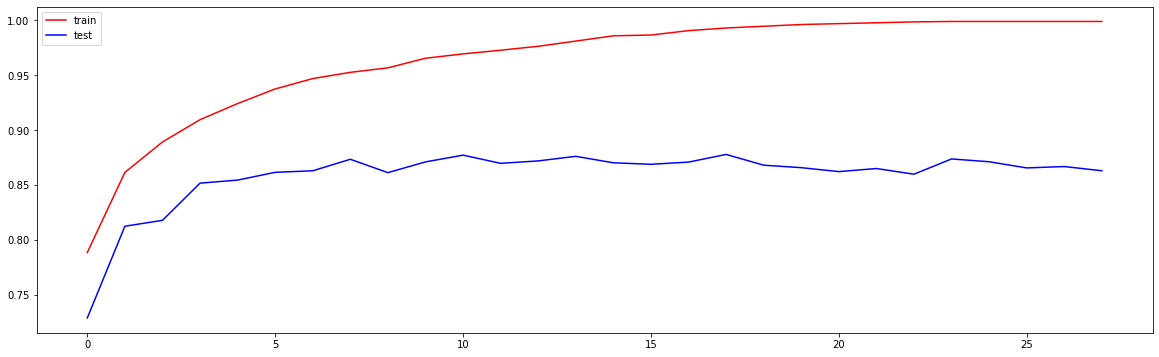

In [160]:
fig,ax = plt.subplots(figsize = (20,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.legend()

## This graph is called a validation curve

What we have done is plotted the performance of the training and testing data against a parameter that was varied. How do we read this graph?
What information can you glean?
When does our model start to overfit?  
Based on what you see here, what do you think the best choice for the parameter you were checking is?  That is, looking at the graph, what value would you choose for a spam detection model that you were going to deploy? Don't forget the purpose of the model!


#### Your answers here

In [ ]:
# How I read this graph/What I glean:
#     I see the F1 score increasing as the max depth increases until a point: 
        # around max depth of 4 or 5. So 'max depth', the parameter I find most useful, 
        # indicates the optimal threshold for the model is a max_depth value of 4 or 5.
# Point of Overfit:
#     The overfitting, given the above parameter, begins occurring at a value of 5 or 6.
# Chosen parameter:
#     Max Depth appears to be the most effective parameter for a spam-detection model.




# Finally... we ... made a mistake!
Do you see what the giant mistake we did? Go ahead and let us know below.
If you don't see the mistake... don't worry I'll explain in the next unit!


#### Your answer here

In [ ]:
# Mistake?
#     Not sure